# Chapter: Decision Trees and Ensemble Learning


# Topic: Soft sensing via XGBoost on UCI Wastewater Treatment Plant data

In [1]:
# read data
import pandas as pd

data_raw = pd.read_csv('water-treatment.data', header=None,na_values="?" ) # dataset uses '?' to denote missing value
X_raw = data_raw.iloc[:,1:23]
y_raw = data_raw.iloc[:,29]

In [2]:
# handle missing data
# generate a dataframe from inputs dataframe and output series
data = pd.concat([X_raw, y_raw], axis=1)

# check for presence of missing values
print(data.info())

# remove rows with missing data
data.dropna(axis=0, how='any', inplace=True)

print('Number of samples remaining:', data.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       509 non-null    float64
 1   2       524 non-null    float64
 2   3       527 non-null    float64
 3   4       504 non-null    float64
 4   5       521 non-null    float64
 5   6       526 non-null    float64
 6   7       516 non-null    float64
 7   8       502 non-null    float64
 8   9       527 non-null    int64  
 9   10      527 non-null    float64
 10  11      487 non-null    float64
 11  12      527 non-null    int64  
 12  13      516 non-null    float64
 13  14      503 non-null    float64
 14  15      527 non-null    int64  
 15  16      527 non-null    float64
 16  17      499 non-null    float64
 17  18      518 non-null    float64
 18  19      525 non-null    float64
 19  20      514 non-null    float64
 20  21      502 non-null    float64
 21  22      527 non-null    int64  
 22  29

In [3]:
# separate inputs and output
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

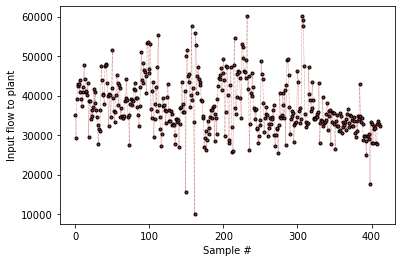

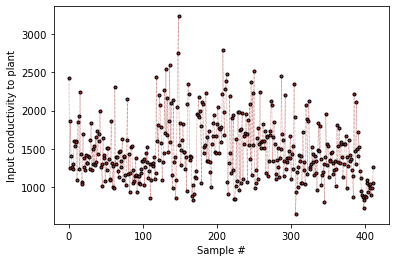

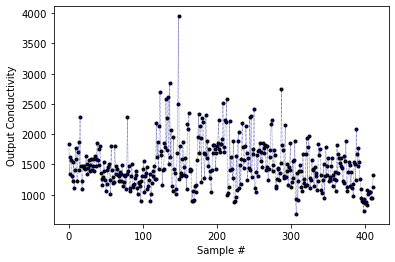

In [4]:
# plot 1st input and output to show variability
from matplotlib import pyplot as plt
plt.figure()
plt.plot(X.iloc[:,0].values, color='brown', linestyle = ':', marker='.', linewidth=0.5, markeredgecolor = 'k')
plt.xlabel('Sample #')
plt.ylabel('Input flow to plant')

plt.figure()
plt.plot(X.iloc[:,8].values, color='brown', linestyle = ':', marker='.', linewidth=0.5, markeredgecolor = 'k')
plt.xlabel('Sample #')
plt.ylabel('Input conductivity to plant')

plt.figure()
plt.plot(y.values, color='navy', linestyle = ':', marker='.', linewidth=0.5, markeredgecolor = 'k')
plt.xlabel('Sample #')
plt.ylabel('Output Conductivity')
plt.show()

In [5]:
# separate fitting, validation, and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
X_fit, X_val, y_fit, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 100)

In [6]:
# fit XGBoost model
import xgboost 
model = xgboost.XGBRegressor(max_depth=3, learning_rate=0.1, random_state=100)
model.fit(X_fit, y_fit, eval_set=[(X_val, y_val)], early_stopping_rounds=2)

[0]	validation_0-rmse:1374.03943
[1]	validation_0-rmse:1242.94312
[2]	validation_0-rmse:1123.29248
[3]	validation_0-rmse:1017.08093
[4]	validation_0-rmse:919.90143
[5]	validation_0-rmse:834.65100
[6]	validation_0-rmse:754.64911
[7]	validation_0-rmse:683.34222
[8]	validation_0-rmse:619.67981
[9]	validation_0-rmse:562.12653
[10]	validation_0-rmse:509.57181
[11]	validation_0-rmse:463.88590
[12]	validation_0-rmse:422.73605
[13]	validation_0-rmse:385.77640
[14]	validation_0-rmse:353.76679
[15]	validation_0-rmse:323.98904
[16]	validation_0-rmse:298.59210
[17]	validation_0-rmse:275.25778
[18]	validation_0-rmse:252.31326
[19]	validation_0-rmse:234.19884
[20]	validation_0-rmse:217.23245
[21]	validation_0-rmse:202.74109
[22]	validation_0-rmse:189.72644
[23]	validation_0-rmse:179.01959
[24]	validation_0-rmse:169.37527
[25]	validation_0-rmse:160.86706
[26]	validation_0-rmse:153.85809
[27]	validation_0-rmse:147.92317
[28]	validation_0-rmse:142.69760
[29]	validation_0-rmse:138.20435
[30]	validation_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=100,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

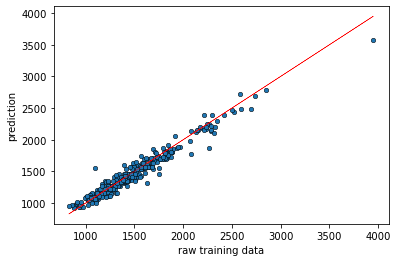

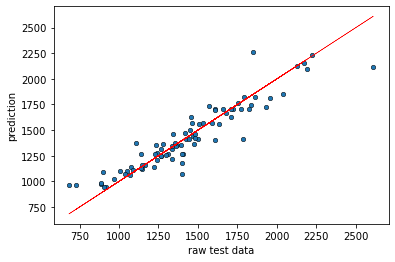

In [7]:
# predict and plot
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

plt.figure()
plt.plot(y_train, y_train_predicted, '.', markeredgecolor='k', markeredgewidth=0.5, ms=9)
plt.plot(y_train, y_train, '-r', linewidth=0.5)
plt.xlabel('raw training data')
plt.ylabel('prediction')

plt.figure()
plt.plot(y_test, y_test_predicted, '.', markeredgecolor='k', markeredgewidth=0.5, ms=9)
plt.plot(y_test, y_test, '-r', linewidth=0.5)
plt.xlabel('raw test data')
plt.ylabel('prediction')
plt.show()

In [8]:
# check training vs test accuracy
from sklearn.metrics import r2_score
print('Accuracy over training data: ', r2_score(y_train, y_train_predicted))
print('Accuracy over test data: ', r2_score(y_test, y_test_predicted))

Accuracy over training data:  0.9512284636210238
Accuracy over test data:  0.8653355607887497
